In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def get_performance_per_method(df):
    eda, syn, bt = [], [], []

    for size, percentage in df:
        s = df[size][percentage]
        if percentage == '0':
            baseline = s[0]
        else:
            eda.append((percentage, size, round(s[0] - baseline, 3)))
            syn.append((percentage, size, round(s[1] - baseline, 3)))
            bt.append((percentage, size, round(s[2] - baseline, 3)))

    eda_df = pd.DataFrame(eda, columns=['percentage', 'limit', 'delta'])
    eda_df.set_index(['limit', 'percentage'], inplace=True)
    
    syn_df = pd.DataFrame(syn, columns=['percentage', 'limit', 'delta'])
    syn_df.set_index(['limit', 'percentage'], inplace=True)
    
    bt_df = pd.DataFrame(bt, columns=['percentage', 'limit', 'delta'])
    bt_df.set_index(['limit', 'percentage'], inplace=True)
    
    return eda_df, syn_df, bt_df

In [3]:
def get_agg_avg_gains(avg_gain_df):
    methods = {method: [] for method in ['eda', 'syn', 'bt']}
    for method in avg_gain_df:
        methods[method].append(round(avg_gain_df[method].mean(), 4))
    methods_df = pd.DataFrame(methods)
    
    limits = {limit: [] for limit in ['10000', '5000', '2000', '1000', '500']}
    for index in avg_gain_df.index:
        limits[index].append(round(avg_gain_df.loc[index, :].mean(), 4))
    limits_df = pd.DataFrame(limits)
    
    return methods_df, limits_df

In [4]:
def custom_plot(df, kind='line', title=None, ylabel=None, xlabel=None, new_columns=None, hline=True):
    new_df = df.copy()
    if new_columns is not None:
        new_df.columns = new_columns
    new_df.plot(kind=kind)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if hline:
        plt.axhline(color='r', linestyle='--', linewidth=.5)
    plt.grid(linestyle='dotted', linewidth=.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [5]:
def get_analysis(results_csv):
    print(f'Reading {results_csv}')
    df = pd.read_csv(results_csv, index_col=0, header=[0,1])
    print(f'\nData:')
    display(df)
    
    eda_performance, syn_performance, bt_performance = get_performance_per_method(df)
    print(f'\nEDA performance gains:')
    display(eda_performance)
    
    print(f'\nSynonym/Embedding performance gains:')
    display(syn_performance)
    
    print(f'\nBacktranslation performance gains:')
    display(bt_performance)
    
    eda_avg_gain = eda_performance.groupby(
        'limit'
    ).mean().sort_values('limit', key=lambda x: sorted(x, key=lambda x: int(x))).apply(lambda x: round(x, 3))
    
    syn_avg_gain = syn_performance.groupby(
        'limit'
    ).mean().sort_values('limit', key=lambda x: sorted(x, key=lambda x: int(x))).apply(lambda x: round(x, 3))
    
    bt_avg_gain = bt_performance.groupby(
        'limit'
    ).mean().sort_values('limit', key=lambda x: sorted(x, key=lambda x: int(x))).apply(lambda x: round(x, 3))
    
    avg_gain = pd.concat([
        eda_avg_gain,
        syn_avg_gain,
        bt_avg_gain
    ], axis=1)
    avg_gain.columns = ['eda', 'syn', 'bt']
    
    print(f'\nAverage performance gains:')
    display(avg_gain)
    
    avg_gain_per_method, avg_gain_per_limit = get_agg_avg_gains(avg_gain)
    
    print(f'\nAverage performance gains per method:')
    display(avg_gain_per_method)
    
    print(f'\nAverage performance gains per dataset size:')
    display(avg_gain_per_limit)
    
    print('\nCharts:')
    
    custom_plot(eda_performance, 'bar', title='EDA Performance Overview', new_columns=['Performance'], xlabel='Dataset Size, Augmentation %', ylabel='Performance Gain')
    custom_plot(syn_performance, 'bar', title='Synonym/Embedding Performance Overview', new_columns=['Performance'], xlabel='Dataset Size, Augmentation %', ylabel='Performance Gain')
    custom_plot(bt_performance, 'bar', title='Backtranslation Performance Overview', new_columns=['Performance'], xlabel='Dataset Size, Augmentation %', ylabel='Performance Gain')
    
    custom_plot(avg_gain, 'bar', title='Performance Gains per Dataset Size', ylabel='Performance Gain', xlabel='Dataset Size', new_columns=['EDA', 'Synonym/Embedding', 'Backtranslation'])
    custom_plot(avg_gain_per_method, 'bar', title='Average Performance Gain (Aggregated) per Method', ylabel='Performance Gain', new_columns=['EDA', 'Synonym/Embedding', 'Backtranslation'])
    custom_plot(avg_gain_per_limit, 'bar', title='Average Performance Gain (Aggregated) per Dataset Size', ylabel='Performance Gain')
    
    return df, eda_performance, syn_performance, bt_performance, avg_gain, avg_gain_per_method, avg_gain_per_limit

#  Tweets Sent BR
Weighted F1 score results

Reading metric_data/tweets_f1_score_results.csv

Data:


10000                    5000                    2000        \
                    0     5    10    20     0     5    10    20     0     5   
eda              0.62  0.63  0.64  0.64  0.61  0.63  0.64  0.63  0.62  0.61   
syn_embed        0.62  0.61  0.63  0.64  0.61  0.61  0.61  0.62  0.62  0.61   
backtranslation  0.62  0.65  0.63  0.63  0.61  0.63  0.61  0.62  0.62  0.61   

                             1000                     500                    
                   10    20     0     5    10    20     0     5    10    20  
eda              0.63  0.62  0.57  0.61  0.55  0.55  0.65  0.63  0.63  0.71  
syn_embed        0.60  0.59  0.57  0.58  0.58  0.57  0.65  0.64  0.67  0.65  
backtranslation  0.62  0.58  0.57  0.57  0.58  0.62  0.65  0.63  0.75  0.65


EDA performance gains:


delta
limit percentage       
10000 5            0.01
      10           0.02
      20           0.02
5000  5            0.02
      10           0.03
      20           0.02
2000  5           -0.01
      10           0.01
      20           0.00
1000  5            0.04
      10          -0.02
      20          -0.02
500   5           -0.02
      10          -0.02
      20           0.06


Synonym/Embedding performance gains:


delta
limit percentage       
10000 5           -0.01
      10           0.01
      20           0.02
5000  5            0.00
      10           0.00
      20           0.01
2000  5           -0.01
      10          -0.02
      20          -0.03
1000  5            0.01
      10           0.01
      20           0.00
500   5           -0.01
      10           0.02
      20           0.00


Backtranslation performance gains:


delta
limit percentage       
10000 5            0.03
      10           0.01
      20           0.01
5000  5            0.02
      10           0.00
      20           0.01
2000  5           -0.01
      10           0.00
      20          -0.04
1000  5            0.00
      10           0.01
      20           0.05
500   5           -0.02
      10           0.10
      20           0.00


Average performance gains:


eda    syn     bt
limit                     
10000  0.017  0.007  0.017
5000   0.023  0.003  0.010
2000   0.000 -0.020 -0.017
1000   0.000  0.007  0.020
500    0.007  0.003  0.027


Average performance gains per method:


eda  syn      bt
0  0.0094  0.0  0.0114


Average performance gains per dataset size:


10000   5000    2000   1000     500
0  0.0137  0.012 -0.0123  0.009  0.0123


Charts:


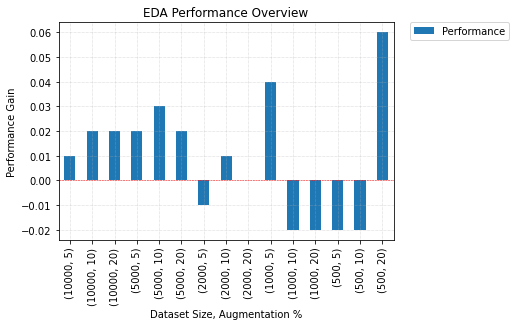

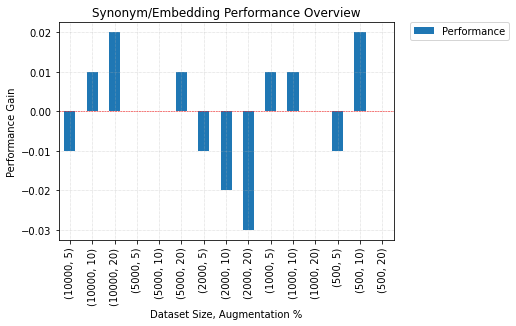

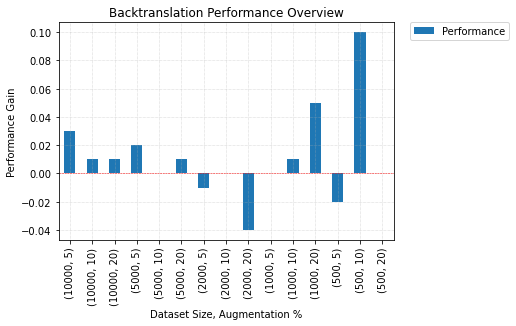

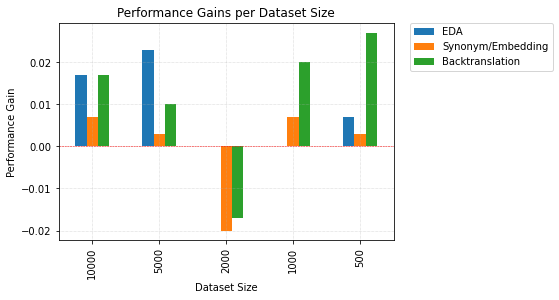

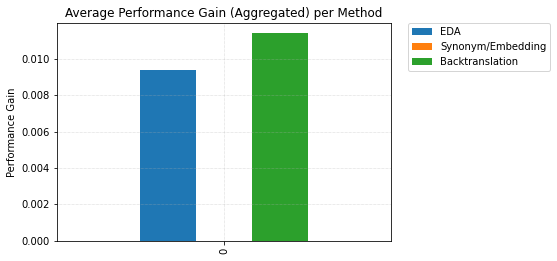

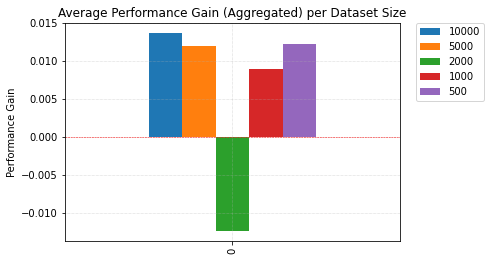

In [6]:
tw_df, tw_eda_performance, tw_syn_performance, tw_bt_performance, tw_avg_gain, tw_avg_gain_per_method, tw_avg_gain_per_limit = get_analysis('metric_data/tweets_f1_score_results.csv')

#  B2W Reviews
Weighted F1 score results

Reading metric_data/b2w_f1_score_results.csv

Data:


10000                   5000                   2000        \
                    0     5    10    20    0     5    10    20    0     5   
eda              0.91  0.91  0.92  0.91  0.9  0.91  0.92  0.90  0.9  0.90   
syn_embed        0.91  0.92  0.91  0.92  0.9  0.91  0.91  0.91  0.9  0.89   
backtranslation  0.91  0.91  0.91  0.91  0.9  0.90  0.91  0.90  0.9  0.89   

                             1000                    500                    
                   10    20     0     5    10    20    0     5    10    20  
eda              0.90  0.87  0.91  0.90  0.92  0.89  0.8  0.83  0.86  0.90  
syn_embed        0.88  0.87  0.91  0.91  0.92  0.88  0.8  0.87  0.87  0.92  
backtranslation  0.88  0.89  0.91  0.91  0.91  0.89  0.8  0.85  0.89  0.82


EDA performance gains:


delta
limit percentage       
10000 5            0.00
      10           0.01
      20           0.00
5000  5            0.01
      10           0.02
      20           0.00
2000  5            0.00
      10           0.00
      20          -0.03
1000  5           -0.01
      10           0.01
      20          -0.02
500   5            0.03
      10           0.06
      20           0.10


Synonym/Embedding performance gains:


delta
limit percentage       
10000 5            0.01
      10           0.00
      20           0.01
5000  5            0.01
      10           0.01
      20           0.01
2000  5           -0.01
      10          -0.02
      20          -0.03
1000  5            0.00
      10           0.01
      20          -0.03
500   5            0.07
      10           0.07
      20           0.12


Backtranslation performance gains:


delta
limit percentage       
10000 5            0.00
      10           0.00
      20           0.00
5000  5            0.00
      10           0.01
      20           0.00
2000  5           -0.01
      10          -0.02
      20          -0.01
1000  5            0.00
      10           0.00
      20          -0.02
500   5            0.05
      10           0.09
      20           0.02


Average performance gains:


eda    syn     bt
limit                     
10000  0.003  0.007  0.000
5000   0.010  0.010  0.003
2000  -0.010 -0.020 -0.013
1000  -0.007 -0.007 -0.007
500    0.063  0.087  0.053


Average performance gains per method:


eda     syn      bt
0  0.0118  0.0154  0.0072


Average performance gains per dataset size:


10000    5000    2000   1000     500
0  0.0033  0.0077 -0.0143 -0.007  0.0677


Charts:


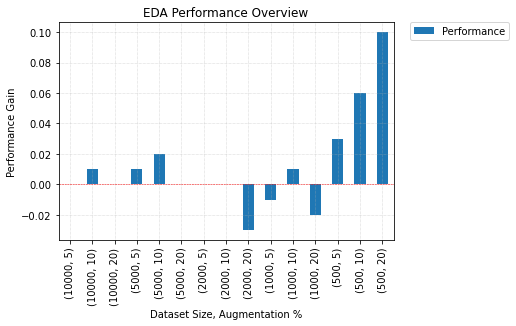

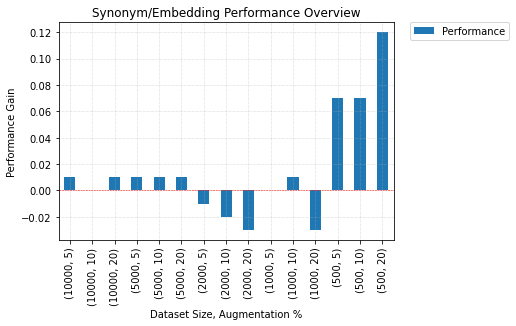

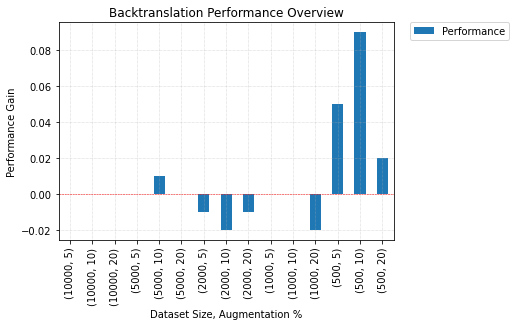

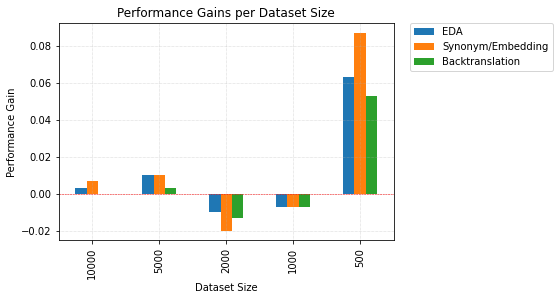

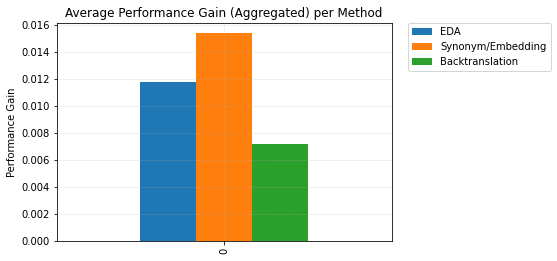

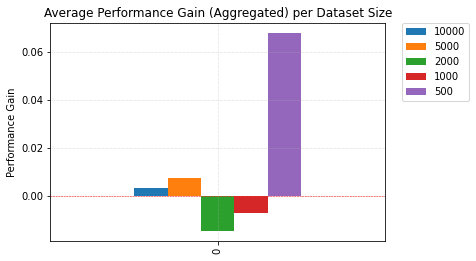

In [7]:
bw_df, bw_eda_performance, bw_syn_performance, bw_bt_performance, bw_avg_gain, bw_avg_gain_per_method, bw_avg_gain_per_limit = get_analysis('metric_data/b2w_f1_score_results.csv')

#  Mercado Libre Challenge
Weighted F1 score results

Reading metric_data/ml_f1_score_results.csv

Data:


10000                    5000                    2000        \
                    0     5    10    20     0     5    10    20     0     5   
eda              0.75  0.73  0.73  0.74  0.66  0.63  0.66  0.66  0.48  0.50   
syn_embed        0.75  0.75  0.73  0.74  0.66  0.65  0.64  0.64  0.48  0.49   
backtranslation  0.75  0.74  0.74  0.74  0.66  0.65  0.68  0.67  0.48  0.47   

                             1000                     500                    
                   10    20     0     5    10    20     0     5    10    20  
eda              0.48  0.48  0.34  0.32  0.33  0.35  0.13  0.19  0.17  0.17  
syn_embed        0.52  0.47  0.34  0.33  0.26  0.34  0.13  0.23  0.18  0.21  
backtranslation  0.48  0.49  0.34  0.37  0.32  0.30  0.13  0.25  0.21  0.20


EDA performance gains:


delta
limit percentage       
10000 5           -0.02
      10          -0.02
      20          -0.01
5000  5           -0.03
      10           0.00
      20           0.00
2000  5            0.02
      10           0.00
      20           0.00
1000  5           -0.02
      10          -0.01
      20           0.01
500   5            0.06
      10           0.04
      20           0.04


Synonym/Embedding performance gains:


delta
limit percentage       
10000 5            0.00
      10          -0.02
      20          -0.01
5000  5           -0.01
      10          -0.02
      20          -0.02
2000  5            0.01
      10           0.04
      20          -0.01
1000  5           -0.01
      10          -0.08
      20           0.00
500   5            0.10
      10           0.05
      20           0.08


Backtranslation performance gains:


delta
limit percentage       
10000 5           -0.01
      10          -0.01
      20          -0.01
5000  5           -0.01
      10           0.02
      20           0.01
2000  5           -0.01
      10           0.00
      20           0.01
1000  5            0.03
      10          -0.02
      20          -0.04
500   5            0.12
      10           0.08
      20           0.07


Average performance gains:


eda    syn     bt
limit                     
10000 -0.017 -0.010 -0.010
5000  -0.010 -0.017  0.007
2000   0.007  0.013  0.000
1000  -0.007 -0.030 -0.010
500    0.047  0.077  0.090


Average performance gains per method:


eda     syn      bt
0  0.004  0.0066  0.0154


Average performance gains per dataset size:


10000    5000    2000    1000     500
0 -0.0123 -0.0067  0.0067 -0.0157  0.0713


Charts:


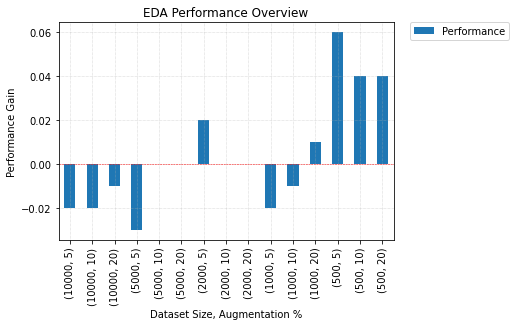

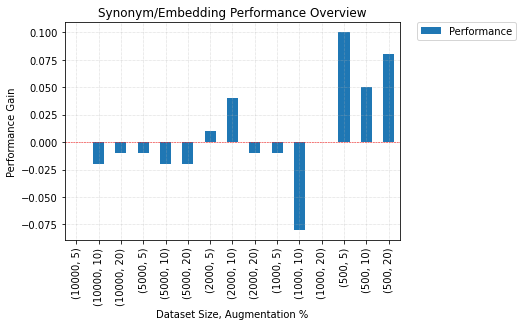

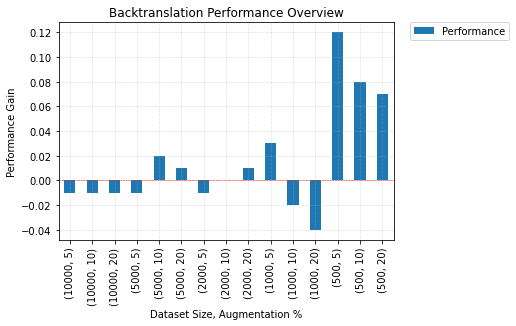

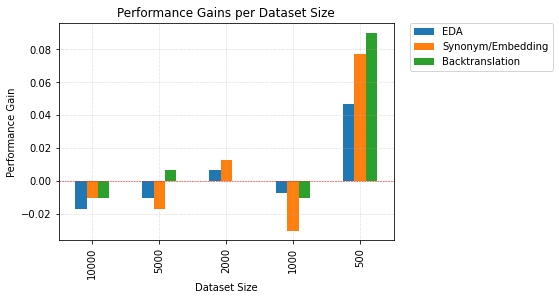

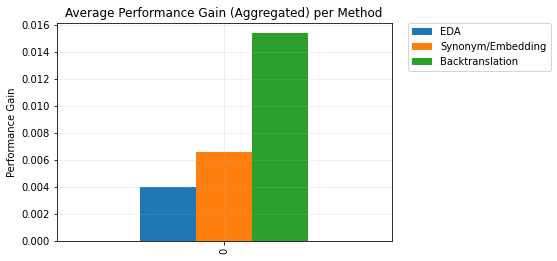

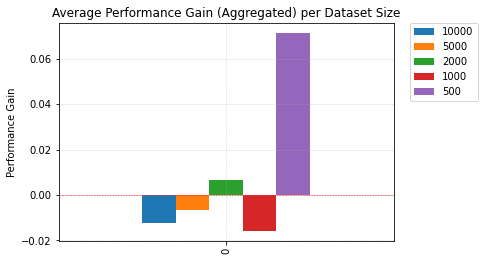

In [8]:
ml_df, ml_eda_performance, ml_syn_performance, ml_bt_performance, ml_avg_gain, ml_avg_gain_per_method, ml_avg_gain_per_limit = get_analysis('metric_data/ml_f1_score_results.csv')

In [9]:
agg_avg_gain_per_method = pd.concat([tw_avg_gain_per_method, bw_avg_gain_per_method, ml_avg_gain_per_method], axis=0)
agg_avg_gain_per_method['dataset'] = ['tweets', 'b2w', 'mercadolibre']
indexed_agg_avg_gain_per_method = agg_avg_gain_per_method.set_index('dataset')
indexed_agg_avg_gain_per_method

eda     syn      bt
dataset                             
tweets        0.0094  0.0000  0.0114
b2w           0.0118  0.0154  0.0072
mercadolibre  0.0040  0.0066  0.0154

In [10]:
indexed_agg_avg_gain_per_method.describe()

eda       syn        bt
count  3.000000  3.000000  3.000000
mean   0.008400  0.007333  0.011333
std    0.003995  0.007726  0.004100
min    0.004000  0.000000  0.007200
25%    0.006700  0.003300  0.009300
50%    0.009400  0.006600  0.011400
75%    0.010600  0.011000  0.013400
max    0.011800  0.015400  0.015400

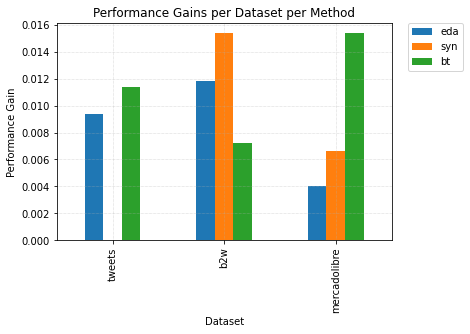

In [11]:
custom_plot(indexed_agg_avg_gain_per_method, 'bar', hline=False, title='Performance Gains per Dataset per Method', ylabel='Performance Gain', xlabel='Dataset')

In [12]:
agg_avg_gain_per_limit = pd.concat([tw_avg_gain_per_limit, bw_avg_gain_per_limit, ml_avg_gain_per_limit], axis=0)
agg_avg_gain_per_limit['dataset'] = ['tweets', 'b2w', 'mercadolibre']
indexed_agg_avg_gain_per_limit = agg_avg_gain_per_limit.set_index('dataset')
indexed_agg_avg_gain_per_limit

10000    5000    2000    1000     500
dataset                                             
tweets        0.0137  0.0120 -0.0123  0.0090  0.0123
b2w           0.0033  0.0077 -0.0143 -0.0070  0.0677
mercadolibre -0.0123 -0.0067  0.0067 -0.0157  0.0713

In [13]:
indexed_agg_avg_gain_per_limit.describe()

10000      5000      2000      1000       500
count  3.000000  3.000000  3.000000  3.000000  3.000000
mean   0.001567  0.004333 -0.006633 -0.004567  0.050433
std    0.013086  0.009794  0.011590  0.012529  0.033073
min   -0.012300 -0.006700 -0.014300 -0.015700  0.012300
25%   -0.004500  0.000500 -0.013300 -0.011350  0.040000
50%    0.003300  0.007700 -0.012300 -0.007000  0.067700
75%    0.008500  0.009850 -0.002800  0.001000  0.069500
max    0.013700  0.012000  0.006700  0.009000  0.071300

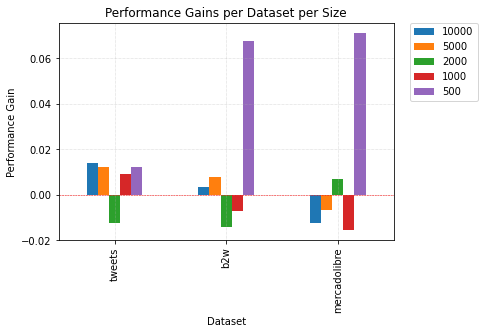

In [14]:
custom_plot(indexed_agg_avg_gain_per_limit, 'bar', title='Performance Gains per Dataset per Size', ylabel='Performance Gain', xlabel='Dataset')